In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.neural_network import MLPClassifier
import warnings

<font color=black size=6><u><b>Data Processing</b></u></font>

In [2]:
#Reading datasets

df_ss_train = pd.read_csv("Samsung_train.csv")
#Samsung's investment information from 01/01/2017 to 09/30/2018 in Korean currency(won) 
df_ss_test = pd.read_csv("Samsung_test.csv")
#Samsung's investment information from 10/01/2018 to 12/31/2018 in Korean currency(won)

df_ts_train = pd.read_csv("TSLA_train.csv")
#Tesla's  investment information from 01/01/2017 to 09/30/2018 in USD
df_ts_test = pd.read_csv("TSLA_test.csv")
#Tesla's  investment information from 10/01/2018 to 12/31/2018 in USD

df_fb_train = pd.read_csv("FB_train.csv")
#Facebook's investment information from 01/01/2017 to 09/30/2018 in USD
df_fb_test = pd.read_csv("FB_test.csv")
#Facebook's investment information from 10/01/2018 to 12/31/2018 in USD

In [3]:
# Description of the data(Samsung)
print("\n\n< Description of the Data (Samsung_train)>")
print(df_ss_train.info())
print("\n\n< Description of the Data (Samsung_test)>")
print(df_ss_test.info())

# Summary of the numerical attributes (Samsung)
print("\n\n< Summary of the numerical attributes (Samsung_train)>\n", df_ss_train.describe())
print("\n\n< Summary of the numerical attributes (Samsung_test)>\n", df_ss_test.describe())

# Check the columns for missing data (Samsung)
print("\n\n< Missing data for the columns (Samsung_train)>\n", df_ss_train.isnull().sum())
print("\n\n< Missing data for the columns (Samsung_test)>\n", df_ss_test.isnull().sum())



< Description of the Data (Samsung_train)>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 7 columns):
Date         423 non-null object
Open         423 non-null int64
High         423 non-null int64
Low          423 non-null int64
Close        423 non-null int64
Adj Close    423 non-null float64
Volume       423 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 23.2+ KB
None


< Description of the Data (Samsung_test)>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
Date         62 non-null object
Open         61 non-null float64
High         61 non-null float64
Low          61 non-null float64
Close        61 non-null float64
Adj Close    61 non-null float64
Volume       61 non-null float64
dtypes: float64(6), object(1)
memory usage: 3.5+ KB
None


< Summary of the numerical attributes (Samsung_train)>
                Open          High           Low         Close    

In [4]:
# Description of the data(Tesla)
print("\n\n< Description of the Data (Tesla_train)>")
print(df_ts_train.info())
print("\n\n< Description of the Data (Tesla_test)>")
print(df_ts_test.info())

# Summary of the numerical attributes (Tesla)
print("\n\n< Summary of the numerical attributes (Tesla_train)>\n", df_ts_train.describe())
print("\n\n< Summary of the numerical attributes (Tesla_test)>\n", df_ts_test.describe())

# Check the columns for missing data (Tesla)
print("\n\n< Missing data for the columns (Tesla_train)>\n", df_ts_train.isnull().sum())
print("\n\n< Missing data for the columns (Tesla_test)>\n", df_ts_test.isnull().sum())



< Description of the Data (Tesla_train)>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 7 columns):
Date         439 non-null object
Open         439 non-null float64
High         439 non-null float64
Low          439 non-null float64
Close        439 non-null float64
Adj Close    439 non-null float64
Volume       439 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 24.1+ KB
None


< Description of the Data (Tesla_test)>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
Date         63 non-null object
Open         63 non-null float64
High         63 non-null float64
Low          63 non-null float64
Close        63 non-null float64
Adj Close    63 non-null float64
Volume       63 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.5+ KB
None


< Summary of the numerical attributes (Tesla_train)>
              Open        High         Low       Close  

In [5]:
# Description of the data (Facebook)
print("\n\n< Description of the Data (Facebook_train)>")
print(df_fb_train.info())
print("\n\n< Description of the Data (Facebook_test)>")
print(df_fb_test.info())

# Summary of the numerical attributes (Facebook)
print("\n\n< Summary of the numerical attributes (Facebook_train)>\n", df_fb_train.describe())
print("\n\n< Summary of the numerical attributes (Facebook_test)>\n", df_fb_test.describe())

# Check the columns for missing data (Samsung)
print("\n\n< Missing data for the columns (Facebook_train)>\n", df_fb_train.isnull().sum())
print("\n\n< Missing data for the columns (Facebook_test)>\n", df_fb_test.isnull().sum())



< Description of the Data (Facebook_train)>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 7 columns):
Date         439 non-null object
Open         439 non-null float64
High         439 non-null float64
Low          439 non-null float64
Close        439 non-null float64
Adj Close    439 non-null float64
Volume       439 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 24.1+ KB
None


< Description of the Data (Facebook_test)>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
Date         63 non-null object
Open         63 non-null float64
High         63 non-null float64
Low          63 non-null float64
Close        63 non-null float64
Adj Close    63 non-null float64
Volume       63 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.5+ KB
None


< Summary of the numerical attributes (Facebook_train)>
              Open        High         Low     

In [6]:
#Dropping Nan values if there exists:

df_ss_train = df_ss_train.dropna()
df_ss_test = df_ss_test.dropna()
df_ss_train = df_ss_train.reset_index(drop=True)
df_ss_test = df_ss_test.reset_index(drop=True)

df_ts_train = df_ts_train.dropna()
df_ts_test = df_ts_test.dropna()
df_ts_train = df_ts_train.reset_index(drop=True)
df_ts_test = df_ts_test.reset_index(drop=True)

df_fb_train = df_fb_train.dropna()
df_fb_test = df_fb_test.dropna()
df_fb_train = df_fb_train.reset_index(drop=True)
df_fb_test = df_fb_test.reset_index(drop=True)

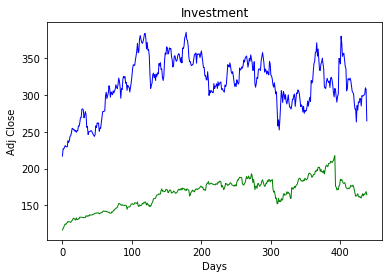

In [7]:
#Graphs of Tesla and Facebook for training data. They have same currency(USD)
plt.plot(range(439), df_ts_train['Adj Close'], "b-",
         alpha=1.0, linewidth=1.0, label="Tesla")
plt.plot(range(439), df_fb_train['Adj Close'], "g-",
         alpha=1.0, linewidth=1.0, label="Facebook")

plt.xlabel("Days")
plt.ylabel("Adj Close")
plt.title("Investment")
plt.show()

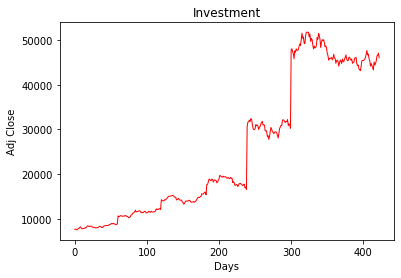

In [8]:
#Graph of Dataset for Samsung for training data. The currency is in won (Korean currency).

plt.plot(range(423), df_ss_train['Adj Close'], "r-",
         alpha = 1.0, linewidth = 1.0, label = "Samsung")

plt.xlabel("Days")
plt.ylabel("Adj Close")
plt.title("Investment")
plt.show()

In [9]:
# data matrix X for SamSung for training
X_ss = df_ss_train[['Open','High','Low', 'Close','Volume']]
X_ss_dates = df_ss_train['Date']
# target vector y for SamSung for training
y_ss = df_ss_train['Adj Close']

# data matrix X for SamSung for validation
X_ss_test = df_ss_test[['Open','High','Low', 'Close','Volume']]
X_ss_test_dates = df_ss_test['Date']
# target vector y for SamSung for validation
y_ss_test = df_ss_test['Adj Close']

# data matrix X for Tesla for traiinng
X_ts = df_ts_train[['Open','High','Low', 'Close','Volume']]
X_ts_dates = df_ts_train['Date']
# target vector y for Tesla for training
y_ts = df_ts_train['Adj Close']

# data matrix X for Tesla for test
X_ts_test = df_ts_test[['Open','High','Low', 'Close','Volume']]
X_ts_dates = df_ts_test['Date']
# target vector y for Tesla for test
y_ts_test = df_ts_test['Adj Close']

# data matrix X for Facebook for traiining
X_fb = df_fb_train[['Open','High','Low', 'Close','Volume']]
X_fb_dates = df_fb_train['Date']
# target vector y for Facebook for training
y_fb = df_fb_train['Adj Close']

# data matrix X for Facebook for test
X_fb_test = df_fb_test[['Open','High','Low', 'Close','Volume']]
X_fb_dates = df_fb_test['Date']
# target vector y for Facebook for test
y_fb_test = df_fb_test['Adj Close']

<font color=black size=6><u><b>Linear Regression</b></u></font>

<font color=black size=3><u><b>(a) Samsung</b></u></font>

Linear Regression test file accuracy:-111.31071263025979
RMSE for Samsung =  21899.084637488097


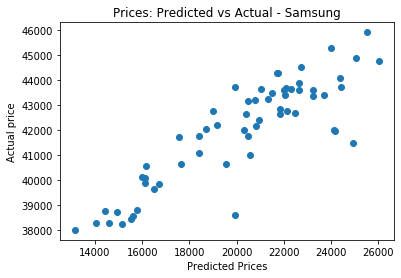

In [11]:
lm_ss = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm_ss.fit(X_ss, y_ss)


accuracy = lm_ss.score(X_ss_test, y_ss_test)
print ("Linear Regression test file accuracy:"+str(accuracy))

y_ss_pred = lm_ss.predict(X_ss_test)
#since test data has the values upto 6th decimal, we rounded the predicted values
y_ss_pred = np.round(y_ss_pred, 6)

plt.scatter(y_ss_pred, y_ss_test)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual price")
plt.title("Prices: Predicted vs Actual - Samsung")
RMSE_ss = np.sqrt(mean_squared_error(y_ss_test,y_ss_pred,))

print("RMSE for Samsung = ", RMSE_ss)

<font color=black size=3><u><b>(b) Tesla</b></u></font>

Linear Regression test file accuracy:1.0
0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     5.684342e-14
10    0.000000e+00
11    0.000000e+00
12    5.684342e-14
13    0.000000e+00
14    0.000000e+00
15    0.000000e+00
16    0.000000e+00
17    0.000000e+00
18    0.000000e+00
19    0.000000e+00
20    0.000000e+00
21    0.000000e+00
22    0.000000e+00
23    5.684342e-14
24    0.000000e+00
25    0.000000e+00
26    0.000000e+00
27    0.000000e+00
28    0.000000e+00
29    0.000000e+00
          ...     
33    0.000000e+00
34    0.000000e+00
35   -5.684342e-14
36    0.000000e+00
37    0.000000e+00
38    0.000000e+00
39    0.000000e+00
40    0.000000e+00
41    0.000000e+00
42    0.000000e+00
43    0.000000e+00
44    0.000000e+00
45    0.000000e+00
46    0.000000e+00
47   -5.684342e-14
48    0.000000e+00
49    0.000000e+00
50    0.000000e+00
51    0.000000e+00
52    0.0

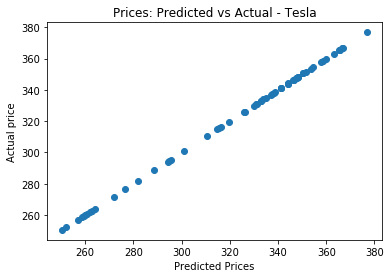

In [15]:
lm_ts = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm_ts.fit(X_ts, y_ts)



y_ts_pred = lm_ts.predict(X_ts_test)

#since test data has the values upto 6th decimal, we rounded the predicted values
y_ts_pred = np.round(y_ts_pred, 6)

accuracy = lm_ts.score(X_ts_test, y_ts_test)

print ("Linear Regression test file accuracy:"+str(accuracy))

plt.scatter(y_ts_pred, y_ts_test)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual price")
plt.title("Prices: Predicted vs Actual - Tesla")

RMSE_ts = np.sqrt(mean_squared_error(y_ts_test,y_ts_pred,))

print("RMSE for Tesla = ", RMSE_ts)

<font color=black size=3><u><b>(c) Facebook</b></u></font>

Linear Regression test file accuracy:1.0
RMSE for Facebook =  1.0128028479525118e-14


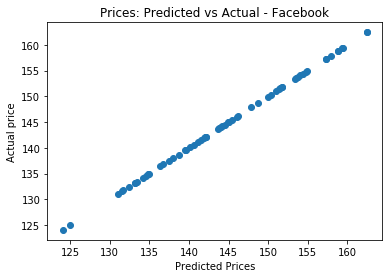

In [12]:
lm_fb = LinearRegression(fit_intercept=True, normalize=True, n_jobs=None)
lm_fb.fit(X_fb, y_fb)


accuracy = lm_fb.score(X_fb_test, y_fb_test)
print ("Linear Regression test file accuracy:"+str(accuracy))

y_fb_pred = lm_fb.predict(X_fb_test)

#since test data has the values upto 6th decimal, we rounded the predicted values
y_fb_pred = np.round(y_fb_pred, 6)

plt.scatter(y_fb_pred, y_fb_test)
plt.xlabel("Predicted Prices")
plt.ylabel("Actual price")
plt.title("Prices: Predicted vs Actual - Facebook")

RMSE_fb = np.sqrt(mean_squared_error(y_fb_test,y_fb_pred,))

print("RMSE for Facebook = ", RMSE_fb)

<font color=black size=6><u><b>Training Logistic Regression</b></u></font>

In [16]:
#classification data: if the adj close price has increased,
#classified 1, if not 0

#Samsung's y (Adj Close) into classification
y_ss_cls = [0]
for i in range(1,len(y_ss)):
    if y_ss[i] > y_ss[i-1]:
        y_ss_cls.append(1)
    else:
        y_ss_cls.append(0)
y_ss_cls = np.asarray(y_ss_cls)

y_ss_test_cls = [0]
for i in range(1,len(y_ss_test)):
    if y_ss_test[i] > y_ss_test[i-1]:
        y_ss_test_cls.append(1)
    else:
        y_ss_test_cls.append(0)
y_ss_test_cls = np.asarray(y_ss_test_cls)

#Tesla's y (Adj Close) into classification
y_ts_cls = [0]
for i in range(1,len(y_ts)):
    if y_ts[i] > y_ts[i-1]:
        y_ts_cls.append(1)
    else:
        y_ts_cls.append(0)
y_ts_cls = np.asarray(y_ts_cls)

y_ts_test_cls = [0]
for i in range(1,len(y_ts_test)):
    if y_ts_test[i] > y_ts_test[i-1]:
        y_ts_test_cls.append(1)
    else:
        y_ts_test_cls.append(0)
y_ts_test_cls = np.asarray(y_ts_test_cls)

#Facebook's y (Adj Close) into classification
y_fb_cls = [0]
for i in range(1,len(y_fb)):
    if y_fb[i] > y_fb[i-1]:
        y_fb_cls.append(1)
    else:
        y_fb_cls.append(0)
y_fb_cls = np.asarray(y_fb_cls)

y_fb_test_cls = [0]
for i in range(1,len(y_fb_test)):
    if y_fb_test[i] > y_fb_test[i-1]:
        y_fb_test_cls.append(1)
    else:
        y_fb_test_cls.append(0)
y_fb_test_cls = np.asarray(y_fb_test_cls)

<font color=black size=3><u><b>(a) Samsung</b></u></font>

In [17]:
%%time
warnings.filterwarnings('ignore')

#Training Logistic Regression Classifier on Samsung
param_grid_ss = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000, 2000],'C': [1, 10, 50]}

log_ss = LogisticRegression()

log_ss_cv = GridSearchCV(log_ss, param_grid_ss, scoring='accuracy', cv=10)
log_ss_cv.fit(X_ss, y_ss_cls)

params_optimal_log_ss = log_ss_cv.best_params_

print("Best Score (accuracy): %f" % log_ss_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_log_ss)
print("\n")

Best Score (accuracy): 0.761229
Optimal Hyperparameter Values:  {'C': 1, 'max_iter': 500, 'solver': 'newton-cg', 'tol': 0.001}


Wall time: 1min 1s


In [18]:
#Evaluation of Samsung's classification using Logistic Regression:
log_ss_clf = LogisticRegression(**params_optimal_log_ss)

log_ss_clf.fit(X_ss, y_ss_cls)

y_ss_pred = log_ss_clf.predict(X_ss_test)

accuracy_log_ss = np.mean(y_ss_pred == y_ss_test_cls)
print("\nTest Accuracy: ", accuracy_log_ss)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_ss_test_cls, y_ss_pred))

precision_test = precision_score(y_ss_test_cls, y_ss_pred) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_ss_test_cls, y_ss_pred)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_ss_test_cls, y_ss_pred)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_ss_test_cls, y_ss_pred))


Test Accuracy:  0.7049180327868853

Test Confusion Matrix:
[[25 11]
 [ 7 18]]

Test Precision = 0.620690
Test Recall = 0.720000
Test F1 Score = 0.666667

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.69      0.74        36
           1       0.62      0.72      0.67        25

    accuracy                           0.70        61
   macro avg       0.70      0.71      0.70        61
weighted avg       0.72      0.70      0.71        61



<font color=black size=3><u><b>(b) Tesla</b></u></font>

In [19]:
%%time
warnings.filterwarnings('ignore')

#Training Logistic Regression Classifier on Tesla
param_grid_ts = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000, 2000],'C': [1, 10, 50]}

log_ts = LogisticRegression()

log_ts_cv = GridSearchCV(log_ts, param_grid_ts, scoring='accuracy', cv=10)
log_ts_cv.fit(X_ts, y_ts_cls)

params_optimal_log_ts = log_ts_cv.best_params_

print("Best Score (accuracy): %f" % log_ts_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_log_ts)
print("\n")

Best Score (accuracy): 0.831435
Optimal Hyperparameter Values:  {'C': 1, 'max_iter': 500, 'solver': 'liblinear', 'tol': 1e-05}


Wall time: 1min 18s


In [20]:
#Evaluation of Tesla's classification using Logistic Regression:
log_ts_clf = LogisticRegression(**params_optimal_log_ts)

log_ts_clf.fit(X_ts,y_ts_cls)

y_ts_pred = log_ts_clf.predict(X_ts_test)

accuracy_log_ts = np.mean(y_ts_pred == y_ts_test_cls)
print("\nTest Accuracy: ", accuracy_log_ts)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_ts_test_cls, y_ts_pred))

precision_test = precision_score(y_ts_test_cls, y_ts_pred) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_ts_test_cls, y_ts_pred)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_ts_test_cls, y_ts_pred)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_ts_test_cls, y_ts_pred))


Test Accuracy:  0.8253968253968254

Test Confusion Matrix:
[[28  5]
 [ 6 24]]

Test Precision = 0.827586
Test Recall = 0.800000
Test F1 Score = 0.813559

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.83      0.80      0.81        30

    accuracy                           0.83        63
   macro avg       0.83      0.82      0.82        63
weighted avg       0.83      0.83      0.83        63



<font color=black size=3><u><b>(c) Facebook</b></u></font>

In [21]:
%%time
warnings.filterwarnings('ignore')

#Training Logistic Regression Classifier on Facebook

param_grid_fb = {'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000, 2000],'C': [1, 10, 50]}

log_fb = LogisticRegression()

log_fb_cv = GridSearchCV(log_fb, param_grid_fb, scoring='accuracy', cv=10)
log_fb_cv.fit(X_fb, y_fb_cls)

params_optimal_log_fb = log_fb_cv.best_params_

print("Best Score (accuracy): %f" % log_fb_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_log_fb)
print("\n")

Best Score (accuracy): 0.820046
Optimal Hyperparameter Values:  {'C': 10, 'max_iter': 500, 'solver': 'newton-cg', 'tol': 0.001}


Wall time: 58.7 s


In [22]:
#Evaluation of Facebook's classification using Logistic Regression:
log_fb_clf = LogisticRegression(**params_optimal_log_fb)

log_fb_clf.fit(X_fb,y_fb_cls)

y_fb_pred = log_fb_clf.predict(X_fb_test)

accuracy_log_fb = np.mean(y_fb_pred == y_fb_test_cls)
print("\nTest Accuracy: ", accuracy_log_fb)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_fb_test_cls, y_fb_pred))

precision_test = precision_score(y_fb_test_cls, y_fb_pred) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_fb_test_cls, y_fb_pred)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_fb_test_cls, y_fb_pred)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_fb_test_cls, y_fb_pred))


Test Accuracy:  0.7301587301587301

Test Confusion Matrix:
[[26  7]
 [10 20]]

Test Precision = 0.740741
Test Recall = 0.666667
Test F1 Score = 0.701754

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        33
           1       0.74      0.67      0.70        30

    accuracy                           0.73        63
   macro avg       0.73      0.73      0.73        63
weighted avg       0.73      0.73      0.73        63



<font color=black size=6><u><b>Training ANN(MLP)</b></u></font>

<font color=black size=3><u><b>(a) Samsung</b></u></font>

In [23]:
%%time
warnings.filterwarnings('ignore')

#Training MLP on Samsung:
param_grid_ss = {'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000, 2000], 
               'alpha': [0.001, 0.01, 0.1],
             'hidden_layer_sizes' : [(100,), (100, 100),
                                    (200,), (200, 200,)]}

MLP_ss = MLPClassifier()

MLP_ss_cv = GridSearchCV(MLP_ss, param_grid_ss, scoring='accuracy', cv=10)
MLP_ss_cv.fit(X_ss, y_ss_cls)

params_optimal_MLP_ss = MLP_ss_cv.best_params_

print("Best Score (accuracy): %f" % MLP_ss_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_MLP_ss)
print("\n")

Best Score (accuracy): 0.522459
Optimal Hyperparameter Values:  {'alpha': 0.01, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'tol': 0.001}


Wall time: 1h 4min 4s


In [27]:
#Evaluation of Samsung's classification using MLP:
MLP_ss_clf = MLPClassifier(**params_optimal_MLP_ss)

MLP_ss_clf.fit(X_ss,y_ss_cls)

y_ss_pred = MLP_ss_clf.predict(X_ss_test)

accuracy_MLP_ss = np.mean(y_ss_pred == y_ss_test_cls)
print("\nTest Accuracy: ", accuracy_MLP_ss)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_ss_test_cls, y_ss_pred))

precision_test = precision_score(y_ss_test_cls, y_ss_pred) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_ss_test_cls, y_ss_pred)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_ss_test_cls, y_ss_pred)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_ss_test_cls, y_ss_pred))


Test Accuracy:  0.5901639344262295

Test Confusion Matrix:
[[36  0]
 [25  0]]

Test Precision = 0.000000
Test Recall = 0.000000
Test F1 Score = 0.000000

Classification Report:
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        36
           1       0.00      0.00      0.00        25

    accuracy                           0.59        61
   macro avg       0.30      0.50      0.37        61
weighted avg       0.35      0.59      0.44        61



<font color=black size=3><u><b>(b) Tesla</b></u></font>

In [29]:
%%time
#Training MLP on Tesla
param_grid_ts = {'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000, 2000], 
               'alpha': [0.001, 0.01, 0.1],
             'hidden_layer_sizes' : [(100,), (100, 100),
                                    (200,), (200, 200,)]}

MLP_ts = MLPClassifier()

MLP_ts_cv = GridSearchCV(MLP_ss, param_grid_ss, scoring='accuracy', cv=10)
MLP_ts_cv.fit(X_ts, y_ts_cls)

params_optimal_MLP_ts = MLP_ts_cv.best_params_

print("Best Score (accuracy): %f" % MLP_ts_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_MLP_ts)
print("\n")

Best Score (accuracy): 0.501139
Optimal Hyperparameter Values:  {'alpha': 0.001, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'tol': 0.0001}


Wall time: 1h 2min 1s


In [30]:
#Evaluation of Tesla's classification using MLP:
MLP_ts_clf = MLPClassifier(**params_optimal_MLP_ts)

MLP_ts_clf.fit(X_ts,y_ts_cls)

y_ts_pred = MLP_ts_clf.predict(X_ts_test)

accuracy_MLP_ts = np.mean(y_ts_pred == y_ts_test_cls)
print("\nTest Accuracy: ", accuracy_MLP_ts)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_ts_test_cls, y_ts_pred))

precision_test = precision_score(y_ts_test_cls, y_ts_pred) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_ts_test_cls, y_ts_pred)
print("Test Recall = %f" % recall_test)

f1_test = f1_score(y_ts_test_cls, y_ts_pred)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_ts_test_cls, y_ts_pred))


Test Accuracy:  0.47619047619047616

Test Confusion Matrix:
[[ 0 33]
 [ 0 30]]

Test Precision = 0.476190
Test Recall = 1.000000
Test F1 Score = 0.645161

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.48      1.00      0.65        30

    accuracy                           0.48        63
   macro avg       0.24      0.50      0.32        63
weighted avg       0.23      0.48      0.31        63



<font color=black size=3><u><b>(c) Facebook</b></u></font>

In [32]:
%%time
#Training Logistic Regression Classifier on Facebook
param_grid_fb = {'tol': [1e-3, 1e-4, 1e-5], 'max_iter':[500, 1000, 2000], 
               'alpha': [0.001, 0.01, 0.1],
             'hidden_layer_sizes' : [(100,), (100, 100),
                                    (200,), (200, 200,)]}

MLP_fb = MLPClassifier()

MLP_fb_cv = GridSearchCV(MLP_fb, param_grid_fb, scoring='accuracy', cv=10)
MLP_fb_cv.fit(X_fb, y_fb_cls)

params_optimal_MLP_fb = MLP_fb_cv.best_params_

print("Best Score (accuracy): %f" % MLP_fb_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_MLP_fb)
print("\n")

Best Score (accuracy): 0.539863
Optimal Hyperparameter Values:  {'alpha': 0.001, 'hidden_layer_sizes': (100, 100), 'max_iter': 1000, 'tol': 0.001}


Wall time: 1h 5min 31s


In [33]:
#Evaluation of Facebook's classification using MLP:
MLP_fb_clf = MLPClassifier(**params_optimal_MLP_fb)

MLP_fb_clf.fit(X_fb,y_fb_cls)

y_fb_pred = MLP_fb_clf.predict(X_fb_test)

accuracy_MLP_ts = np.mean(y_fb_pred == y_fb_test_cls)
print("\nTest Accuracy: ", accuracy_MLP_ts)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_fb_test_cls, y_fb_pred))

precision_test = precision_score(y_fb_test_cls, y_fb_pred) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_fb_test_cls, y_fb_pred)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_fb_test_cls, y_fb_pred)
print("Test F1 Score = %f" % f1_test)

print("\nClassification Report:")
print(classification_report(y_fb_test_cls, y_fb_pred))


Test Accuracy:  0.5238095238095238

Test Confusion Matrix:
[[33  0]
 [30  0]]

Test Precision = 0.000000
Test Recall = 0.000000
Test F1 Score = 0.000000

Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.69        33
           1       0.00      0.00      0.00        30

    accuracy                           0.52        63
   macro avg       0.26      0.50      0.34        63
weighted avg       0.27      0.52      0.36        63

